<a href="https://colab.research.google.com/github/helivelton/colab/blob/main/grupo1_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#GRUPO 1 - JOÃO ANTONIO AMORIM; Washington Barbosa; Helivelton Barbosa; Fernanda Montenegro; Carlos Henrique; André Santos


!pip install ydata-profiling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ydata_profiling import ProfileReport
from google.colab import drive

In [ ]:
#drive.mount('/content/gdrive')
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dongeorge/beer-consumption-sao-paulo")
df = pd.read_csv(path+'/Consumo_cerveja.csv')


Using Colab cache for faster access to the 'beer-consumption-sao-paulo' dataset.


In [ ]:
#df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cerveja/cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info


<bound method DataFrame.info of            Data Temperatura Media (C) Temperatura Minima (C)  \
0    2015-01-01                  27,3                   23,9   
1    2015-01-02                 27,02                   24,5   
2    2015-01-03                 24,82                   22,4   
3    2015-01-04                 23,98                   21,5   
4    2015-01-05                 23,82                     21   
..          ...                   ...                    ...   
936         NaN                   NaN                    NaN   
937         NaN                   NaN                    NaN   
938         NaN                   NaN                    NaN   
939         NaN                   NaN                    NaN   
940         NaN                   NaN                    NaN   

    Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                     32,5                 0              0.0   
1                     33,5                 0              0.0   
2                     29,9                 0              1.0   
3                     28,6               1,2              1.0   
4                     28,3                 0              0.0   
..                     ...               ...              ...   
936                    NaN               NaN              NaN   
937                    NaN               NaN              NaN   
938                    NaN               NaN              NaN   
939                    NaN               NaN              NaN   
940                    NaN               NaN              NaN   

     Consumo de cerveja (litros)  
0                         25.461  
1                         28.972  
2                         30.814  
3                         29.799  
4                         28.900  
..                           ...  
936                          NaN  
937                          NaN  
938                          NaN  
939                          NaN  
940                          NaN  

[941 rows x 7 columns]>

<Axes: >

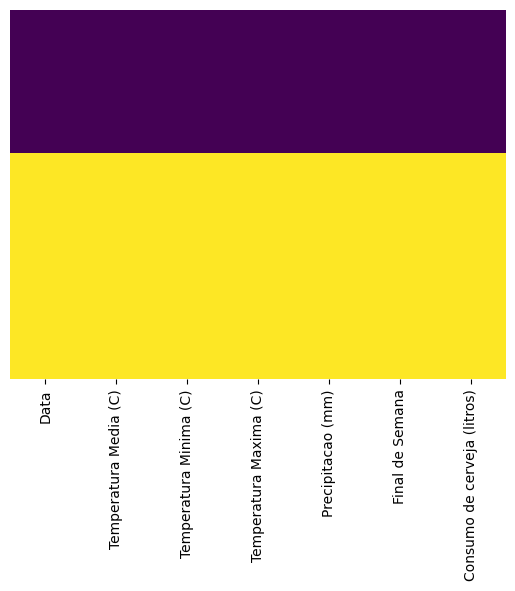

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df = df.dropna(subset=[df.columns[0]]).copy()

In [ ]:
df


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [ ]:
# Converter coluna Data para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Criar coluna com dia da semana
df['dia_nome'] = df['Data'].dt.day_name()

# Se preferir em português:
dias_pt = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
df['Dia_Semana'] = df['Data'].dt.day_name().map(dias_pt)

In [ ]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),dia_nome,Dia_Semana
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461,Thursday,4
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972,Friday,5
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814,Saturday,6
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799,Sunday,7
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900,Monday,1
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307,Sunday,7
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095,Monday,1
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309,Tuesday,2
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467,Wednesday,3


<Axes: >

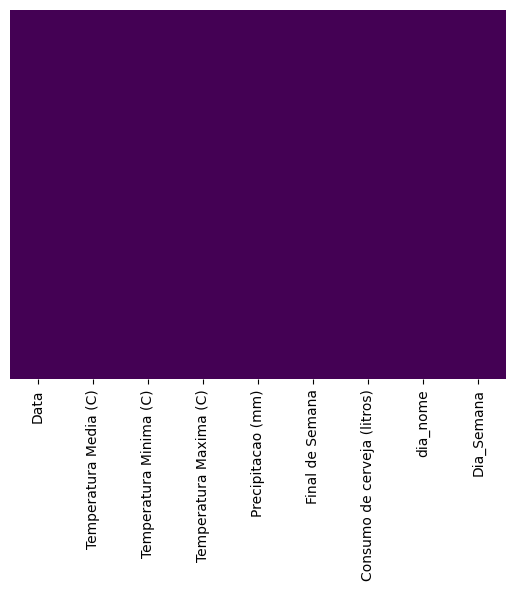

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
#profile = ProfileReport(df, title="Profiling Report")

In [ ]:
#profile.to_file("/content/gdrive/MyDrive/Colab Notebooks/cerveja/your_report.html")

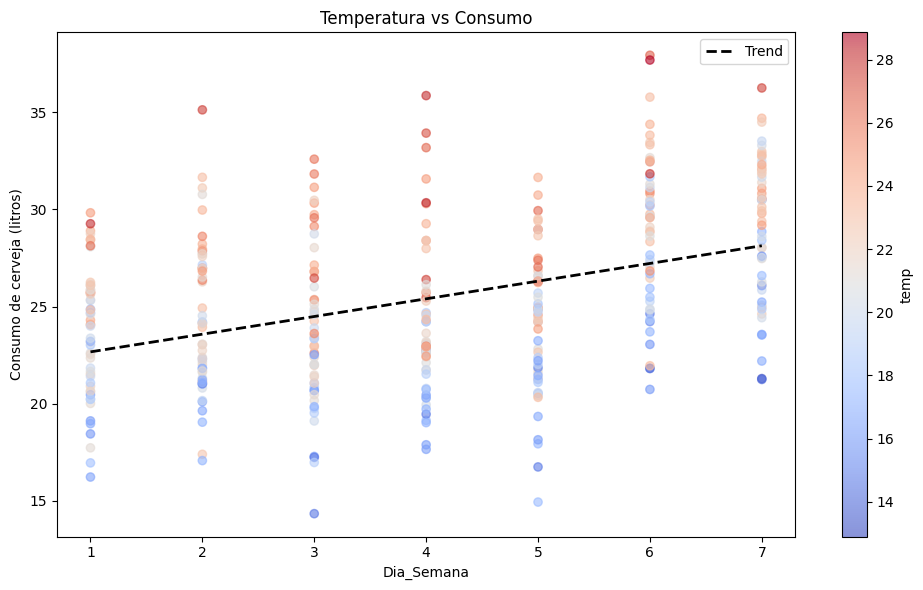

In [ ]:

temp_col = df.columns[1]  # Temperatura Media
consumption_col = df.columns[6]  # Consumo de cerveja
fds = df.columns[5] # Final de semana
dia = df.columns[8]

#df[temp_col] = df[temp_col].str.replace(',', '.').astype(float)

# Scatter plot: Temperature vs Consumption
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df[dia], df[consumption_col], c=df[temp_col], cmap='coolwarm', alpha=0.6)
ax.set_xlabel(dia)
ax.set_ylabel(consumption_col)
ax.set_title('Temperatura vs Consumo')
plt.colorbar(scatter, ax=ax, label='temp')

# Add trend line
z = np.polyfit(df[dia], df[consumption_col], 1)
p = np.poly1d(z)
x_line = np.linspace(df[dia].min(), df[dia].max(), 100)
ax.plot(x_line, p(x_line), 'k--', linewidth=2, label='Trend')
ax.legend()

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Consumo de cerveja (litros)'}, xlabel='Dia_Semana'>

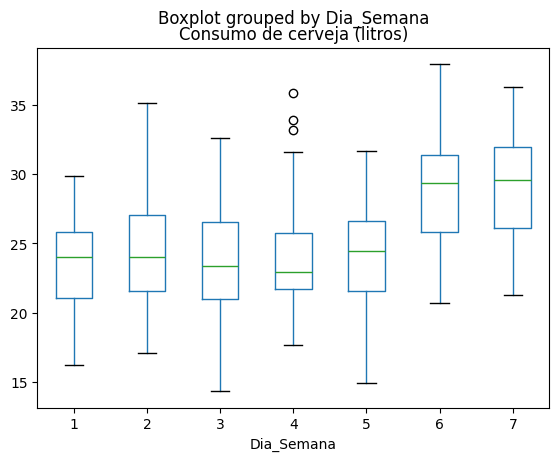

In [ ]:
df.boxplot(by ='Dia_Semana', column =df.columns[6], grid = False)

    dia_nome  Consumo de cerveja (litros)
0     Friday                     1255.170
1     Monday                     1227.701
2   Saturday                     1499.572
3     Sunday                     1508.391
4   Thursday                     1276.057
5    Tuesday                     1266.468
6  Wednesday                     1238.140


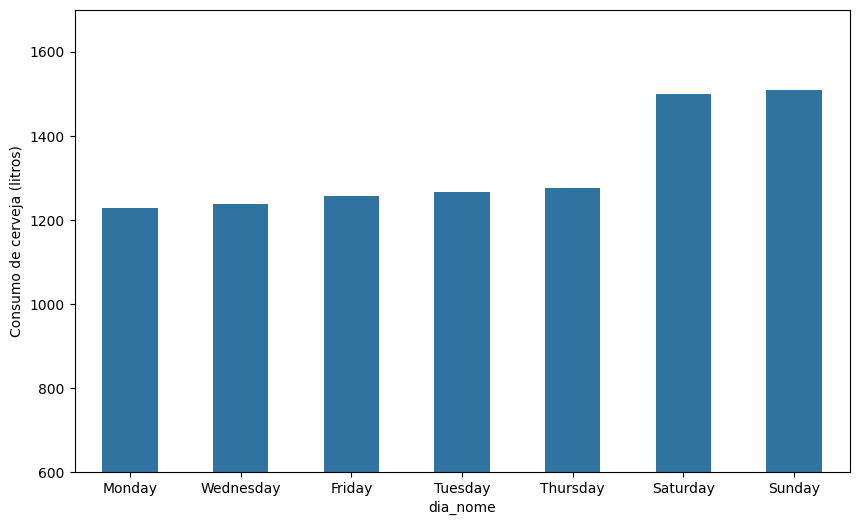

In [ ]:
valores=df.groupby('dia_nome')[df.columns[6]].sum()
valores = valores.reset_index()
print(valores)
plt.figure(figsize=(10,6))
sns.barplot(data=(valores), x='dia_nome', y='Consumo de cerveja (litros)',width=0.5,order=valores.sort_values('Consumo de cerveja (litros)').dia_nome)
plt.ylim(600, 1700)
plt.show()

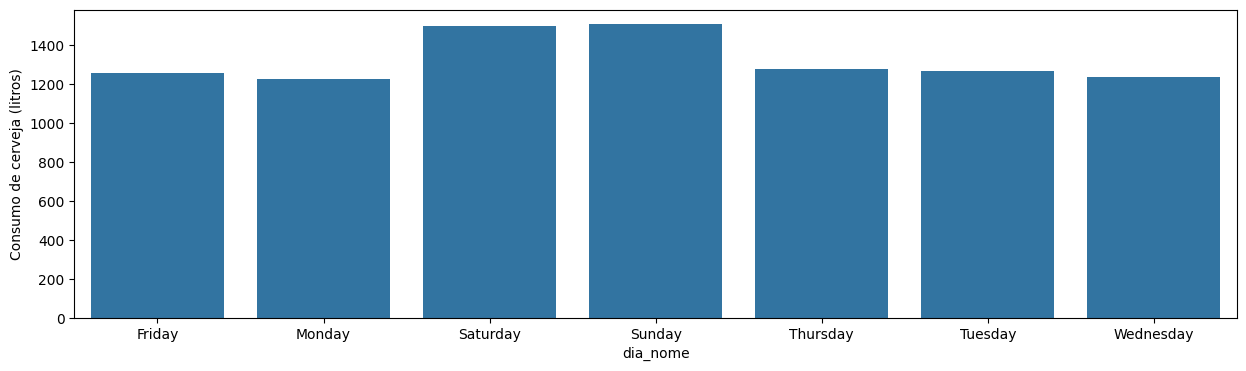

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=(valores), x='dia_nome', y='Consumo de cerveja (litros)');

<Axes: >

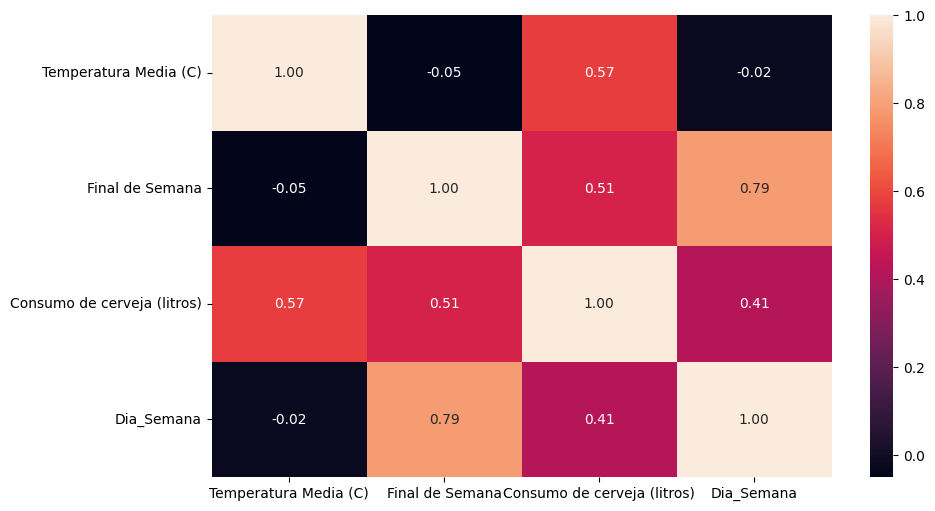

In [ ]:
plt.figure(figsize=(10,6))

temp_col = df.columns[1]
sns.heatmap(df.select_dtypes(include=['float64','int64','bool']).corr(), annot=True, fmt=".2f")

# Task
Plot the sum of beer consumption for each day of the week using `sns.barplot`, converting the `valores` Series to a DataFrame with its index reset.

## Fix Plotting Error

### Subtask:
Convert the `valores` Series into a DataFrame by resetting its index and use `sns.barplot` to visualize the sum of beer consumption for each day of the week, which is a more suitable plot type for this aggregated data. The x-axis will represent the day names and the y-axis will represent the total consumption.


## Summary:

### Data Analysis Key Findings
The plotting error was successfully addressed by converting the `valores` Series into a DataFrame and using `sns.barplot`. This allowed for the visualization of the sum of beer consumption for each day of the week, with day names on the x-axis and total consumption on the y-axis.

### Insights or Next Steps
*   This visualization provides a clear overview of beer consumption patterns across the week, which can be used to identify peak consumption days.
*   The aggregated data can inform staffing, inventory, or promotional strategies tailored to specific days of the week.
